# TensorFlow 선형회귀 실습: 보스턴 주택가격 데이터

이번 실습에서는 보스턴 주택가격 데이터를 활용하여 선형회귀를 적용해봅니다.




## Dataset 설명
- California Housing Dataset은 캘리포니아 주의 주택 가격과 관련된 다양한 특성들을 포함하고 있습니다.
- 이 데이터셋은 주택 가격 예측과 관련된 머신러닝 모델을 개발하는 데 자주 사용됩니다.
- 데이터셋은 8개의 특성과 1개의 타겟 변수로 구성되어 있습니다.

### 특성 설명:
- MedHouseValue (target): 주택 가격 (단위: 10만 달러)
- MedInc: 중간 소득 (단위: 10,000 달러)
- HouseAge: 주택 연령 (단위: 년)
- AveRooms: 평균 방 개수
- AveBedrms: 평균 침실 개수
- Population: 인구 수
- AveOccup: 평균 가구원 수
- Latitude: 위도
- Longitude: 경도

## 실습 목표
1. 데이터 불러오기 및 전처리
2. 데이터 시각화
3. TensorFlow를 활용한 선형회귀 모델 정의 및 학습
4. 결과 해석 및 시각화

In [1]:
import matplotlib.pyplot as plt

# 그래프를 그리기 전에 이 코드를 실행해야 합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

## 문제 1. 데이터 불러오기

In [2]:
import matplotlib
print(matplotlib.get_cachedir())



import matplotlib.pyplot as plt

# 폰트 캐시 삭제 후, 나눔고딕 폰트가 설치되어 있으면 다음 코드가 정상 작동합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

C:\Users\User\.matplotlib


C:\Users\User\.matplotlib
X shape: (20640, 8) y shape: (20640,)
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


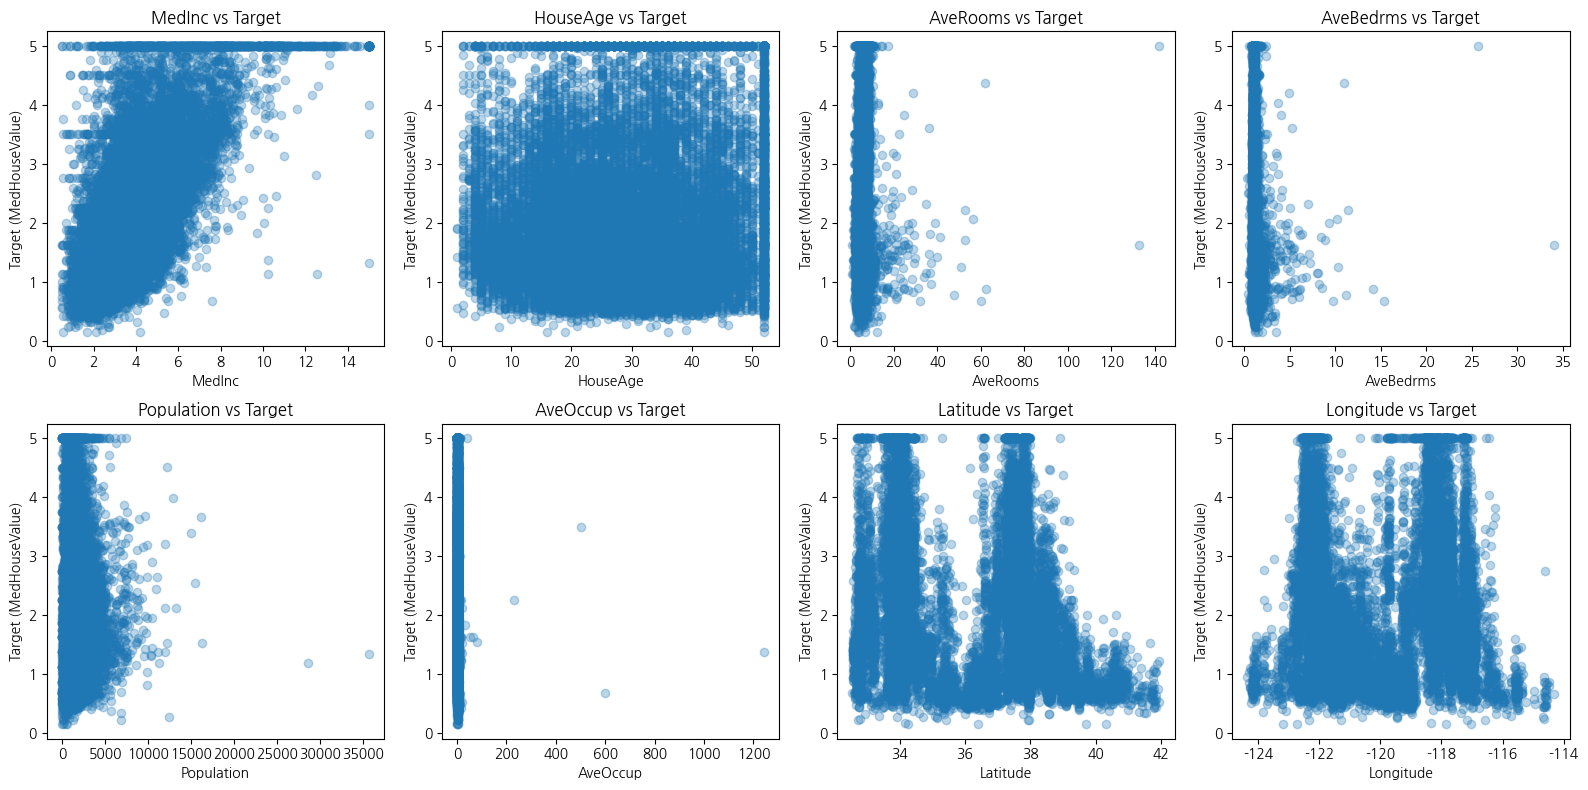

In [3]:

import matplotlib
print(matplotlib.get_cachedir())



import matplotlib.pyplot as plt

# 폰트 캐시 삭제 후, 나눔고딕 폰트가 설치되어 있으면 다음 코드가 정상 작동합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지



import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. 데이터 불러오기 및 준비 ---
# 캘리포니아 주택 가격 데이터셋을 불러옵니다.
california = fetch_california_housing()
X = california.data        # Attributes (8개 특성)
y = california.target      # Target (주택가격)
feature_names = california.feature_names

print("X shape:", X.shape, "y shape:", y.shape)
print("특성 이름:", feature_names)

# --- 2. 한글 폰트 설정 ---
# 시스템에 'NanumGothic'이 설치되어 있어야 합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 3. 데이터 시각화 ---
# 8개의 특성 각각에 대해 산점도 그래프를 그립니다.
plt.figure(figsize=(16, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)  # 2행 4열 subplot
    plt.scatter(X[:, i], y, alpha=0.3)
    plt.xlabel(feature_names[i])
    plt.ylabel("Target (MedHouseValue)")
    plt.title(f"{feature_names[i]} vs Target")

plt.tight_layout()
plt.show()

## 문제 2. 데이터 시각화

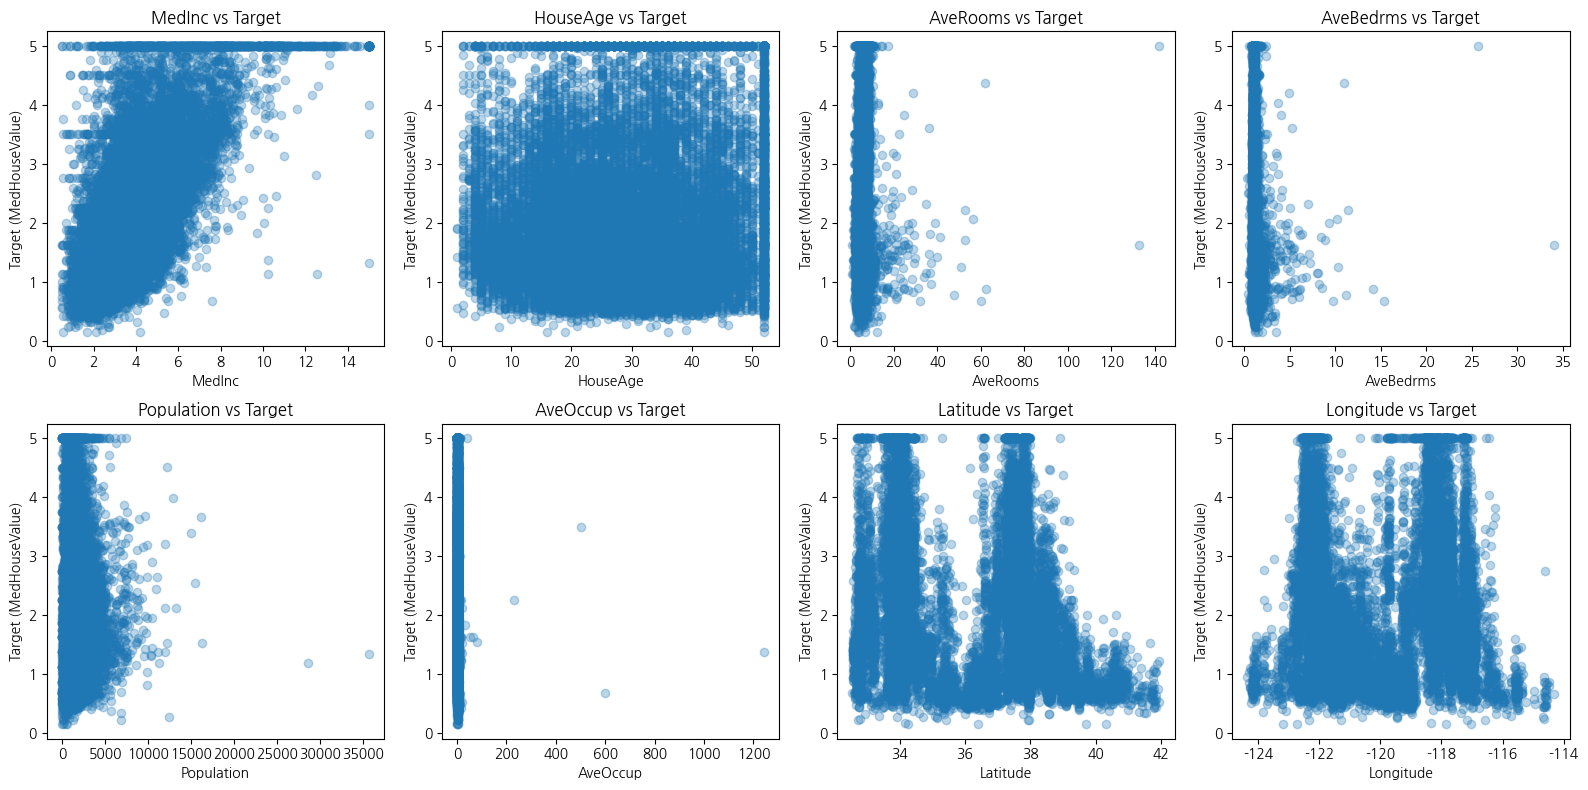

In [4]:
plt.figure(figsize=(16, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)  # 2행 4열 subplot
    plt.scatter(X[:, i], y, alpha=0.3)
    plt.xlabel(feature_names[i])
    plt.ylabel("Target (MedHouseValue)")
    plt.title(f"{feature_names[i]} vs Target")

plt.tight_layout()
plt.show()

## 문제 3. 데이터 전처리

In [5]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 표준화 (정규화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 타깃 차원 맞추기
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("훈련 데이터 shape:", X_train.shape, y_train.shape)
print("테스트 데이터 shape:", X_test.shape, y_test.shape)

훈련 데이터 shape: (16512, 8) (16512, 1)
테스트 데이터 shape: (4128, 8) (4128, 1)


## 문제 4. 모델 정의 및 학습

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
516/516 - 1s - 1ms/step - loss: 2.3630 - val_loss: 0.5588
Epoch 2/50
516/516 - 0s - 884us/step - loss: 1.0308 - val_loss: 0.5450
Epoch 3/50
516/516 - 0s - 881us/step - loss: 0.7937 - val_loss: 0.5561
Epoch 4/50
516/516 - 0s - 874us/step - loss: 0.6286 - val_loss: 0.5718
Epoch 5/50
516/516 - 0s - 877us/step - loss: 0.5639 - val_loss: 0.5451
Epoch 6/50
516/516 - 0s - 871us/step - loss: 0.5315 - val_loss: 0.5452
Epoch 7/50
516/516 - 0s - 876us/step - loss: 0.5314 - val_loss: 0.5539
Epoch 8/50
516/516 - 0s - 861us/step - loss: 0.5238 - val_loss: 0.5517
Epoch 9/50
516/516 - 0s - 861us/step - loss: 0.5267 - val_loss: 0.5481
Epoch 10/50
516/516 - 0s - 885us/step - loss: 0.5232 - val_loss: 0.5606
Epoch 11/50
516/516 - 0s - 859us/step - loss: 0.5231 - val_loss: 0.5733
Epoch 12/50
516/516 - 0s - 848us/step - loss: 0.5354 - val_loss: 0.5857
Epoch 13/50
516/516 - 0s - 871us/step - loss: 0.5249 - val_loss: 0.5470
Epoch 14/50
516/516 - 0s - 856us/step - loss: 0.5251 - val_loss: 0.5526
Epo

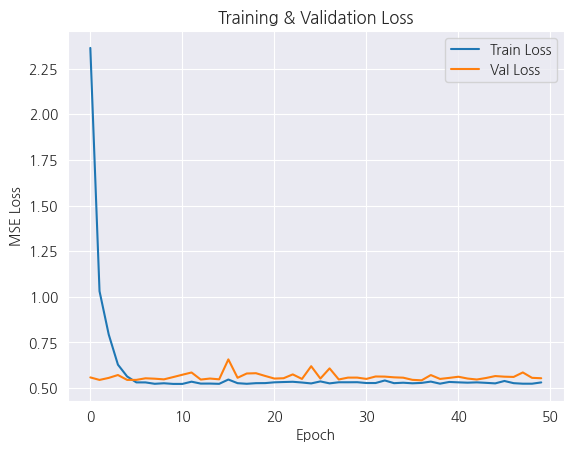

In [30]:
## 2. 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    verbose=2)

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 문제 4. 학습 결과 확인

학습된 가중치(W) shape: (8, 1)
학습된 절편(b): [2.013267]
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


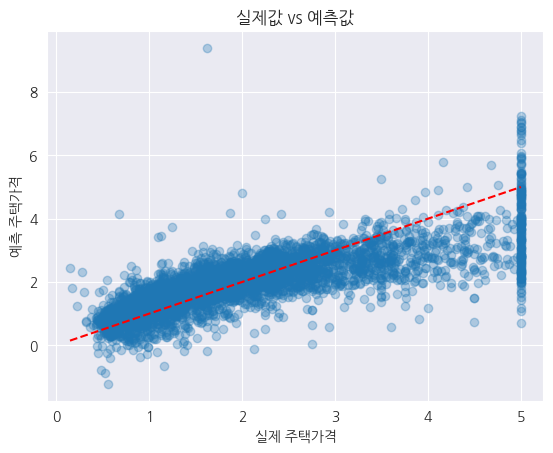

In [31]:
# ----------------------
# 7. 결과 확인
# ----------------------
W, b = model.layers[0].get_weights()
print("학습된 가중치(W) shape:", W.shape)
print("학습된 절편(b):", b)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 산점도 (실제 vs 예측)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("실제 주택가격")
plt.ylabel("예측 주택가격")
plt.title("실제값 vs 예측값")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # y=x 기준선
plt.show()

## 생각해보기
- Scaler를 사용하지 않으면 어떻게 되는가?
- 학습속도 저하 및 불안정성 증가, 특정 피처의 과도한 영향력이 생김, 거리기반 알고리즘의 성능 저하됨